# Local Outlier Factor implementation

In [167]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [168]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.datasets import make_moons

x, y = make_moons(n_samples=300, noise = 0.1)

In [169]:
x

array([[ 1.28124224e+00, -5.44569746e-01],
       [-4.31158125e-01,  6.88438573e-01],
       [-9.52169635e-01,  6.11025164e-01],
       [ 7.93785943e-01,  4.29410099e-01],
       [ 1.66913205e-01,  1.97401948e-01],
       [-5.88335796e-01,  8.59532335e-01],
       [ 2.04231597e+00,  3.56465707e-01],
       [-8.35898046e-01,  5.06534247e-01],
       [ 3.10203492e-01,  9.07186725e-01],
       [ 3.10753824e-01, -1.57577720e-02],
       [ 6.35721322e-02,  4.91651569e-01],
       [ 1.64262719e+00, -5.37322111e-01],
       [-5.75760406e-01,  7.87809606e-01],
       [ 7.13166904e-01, -6.19585795e-01],
       [ 1.85962280e+00, -1.70729526e-01],
       [-1.00029574e+00,  1.28278396e-01],
       [-8.83434338e-01,  2.12800331e-01],
       [ 7.59522545e-01, -4.05382169e-01],
       [ 4.29677996e-01,  7.86386240e-01],
       [ 1.46107925e+00, -2.92493838e-01],
       [ 1.22596264e-01,  1.75793571e-01],
       [ 6.13096736e-01,  7.46368358e-01],
       [-5.16327293e-02,  8.89043676e-01],
       [ 3.

In [171]:
x_outliers = np.random.uniform(low=-3, high=3, size = (20,2))
x = np.vstack((x, x_outliers))
x

array([[ 1.28124224e+00, -5.44569746e-01],
       [-4.31158125e-01,  6.88438573e-01],
       [-9.52169635e-01,  6.11025164e-01],
       [ 7.93785943e-01,  4.29410099e-01],
       [ 1.66913205e-01,  1.97401948e-01],
       [-5.88335796e-01,  8.59532335e-01],
       [ 2.04231597e+00,  3.56465707e-01],
       [-8.35898046e-01,  5.06534247e-01],
       [ 3.10203492e-01,  9.07186725e-01],
       [ 3.10753824e-01, -1.57577720e-02],
       [ 6.35721322e-02,  4.91651569e-01],
       [ 1.64262719e+00, -5.37322111e-01],
       [-5.75760406e-01,  7.87809606e-01],
       [ 7.13166904e-01, -6.19585795e-01],
       [ 1.85962280e+00, -1.70729526e-01],
       [-1.00029574e+00,  1.28278396e-01],
       [-8.83434338e-01,  2.12800331e-01],
       [ 7.59522545e-01, -4.05382169e-01],
       [ 4.29677996e-01,  7.86386240e-01],
       [ 1.46107925e+00, -2.92493838e-01],
       [ 1.22596264e-01,  1.75793571e-01],
       [ 6.13096736e-01,  7.46368358e-01],
       [-5.16327293e-02,  8.89043676e-01],
       [ 3.

In [172]:
out = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
out

LocalOutlierFactor(contamination=0.1)

In [173]:
y_pred = out.fit_predict(x)
y_pred

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

In [174]:
# seperate normal datapoints >> inliers and outliers

x_inliers = x[y_pred == 1]  # 1 is normal dps >> inliers
x_outliers = x[y_pred == -1] # -1 is outlier


In [176]:
x_inliers

array([[ 1.28124224e+00, -5.44569746e-01],
       [-4.31158125e-01,  6.88438573e-01],
       [-9.52169635e-01,  6.11025164e-01],
       [ 7.93785943e-01,  4.29410099e-01],
       [ 1.66913205e-01,  1.97401948e-01],
       [-5.88335796e-01,  8.59532335e-01],
       [ 2.04231597e+00,  3.56465707e-01],
       [-8.35898046e-01,  5.06534247e-01],
       [ 3.10203492e-01,  9.07186725e-01],
       [ 3.10753824e-01, -1.57577720e-02],
       [ 6.35721322e-02,  4.91651569e-01],
       [ 1.64262719e+00, -5.37322111e-01],
       [-5.75760406e-01,  7.87809606e-01],
       [ 7.13166904e-01, -6.19585795e-01],
       [ 1.85962280e+00, -1.70729526e-01],
       [-1.00029574e+00,  1.28278396e-01],
       [-8.83434338e-01,  2.12800331e-01],
       [ 7.59522545e-01, -4.05382169e-01],
       [ 4.29677996e-01,  7.86386240e-01],
       [ 1.46107925e+00, -2.92493838e-01],
       [ 1.22596264e-01,  1.75793571e-01],
       [ 6.13096736e-01,  7.46368358e-01],
       [-5.16327293e-02,  8.89043676e-01],
       [ 3.

In [177]:
x_outliers

array([[ 1.95467195,  0.65721786],
       [ 0.00455724,  0.50702373],
       [-0.23787581,  1.1210882 ],
       [ 1.09393918,  0.74121383],
       [ 0.13177693,  0.55960129],
       [-0.14953103,  0.49471536],
       [ 0.02426788,  0.52571532],
       [-0.99318828,  0.67600539],
       [ 0.127549  , -0.37347807],
       [-0.40282584,  1.12656243],
       [-0.86649825, -0.29754908],
       [-0.14784665,  0.03265714],
       [ 2.0838137 ,  0.49950553],
       [ 1.80200122,  0.62883271],
       [ 0.65320643, -1.59053984],
       [-2.38395148,  0.75507176],
       [-1.57980075, -2.76688619],
       [ 2.43129444, -2.52710491],
       [-0.85368325,  2.30316208],
       [ 0.85464302,  2.33018196],
       [-2.19013039, -0.6772428 ],
       [ 2.25029939, -1.88004089],
       [-0.82659395,  0.02623276],
       [ 2.16666347, -0.00864154],
       [ 2.20625679, -1.17833232],
       [-0.30941616, -1.46153215],
       [ 2.20352815,  0.75064308],
       [ 2.64705006,  1.33110946],
       [-0.23977656,

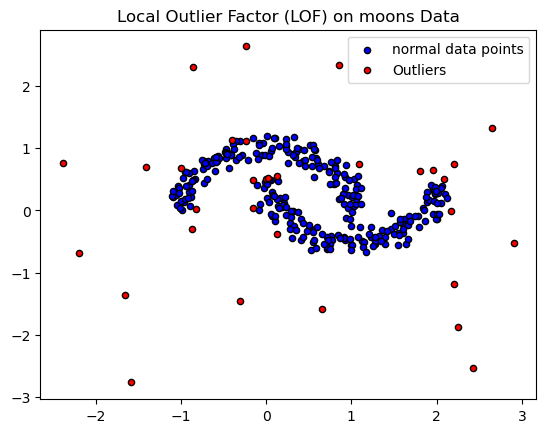

In [178]:
# ploting
plt.title("Local Outlier Factor (LOF) on moons Data")
plt.scatter(x_inliers[:, 0], x_inliers[:, 1], color='b', s=20, edgecolor='k', label='normal data points')
plt.scatter(x_outliers[:, 0], x_outliers[:, 1], color='r', s=20, edgecolor='k', label='Outliers')
plt.legend()
plt.show()